In [195]:
# Imports and load test and training data
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

# Load train and test data from CSV
df_train = pd.read_csv("wildfires_training.csv")
df_test = pd.read_csv("wildfires_test.csv")

print(df_train.head())

  fire  year  temp  humidity  rainfall  drought_code  buildup_index  day  \
0   no  2015    28        59       0.0          8.06           3.47    1   
1   no  2010    30        61       1.3          8.17           4.03    2   
2   no  2009    26        83      13.1          8.08           3.59    3   
3   no  2017    25        87       2.5          7.18           2.42    4   
4   no  2014    28        77       0.0         14.98           4.63    5   

   month  wind_speed  
0      6          19  
1      6          13  
2      6          22  
3      6          15  
4      6          18  


In [196]:
# Change fire column to binary and split into X and Y
y_train = df_train['fire'].map({'no':0,'yes':1}).to_numpy()
X_train = df_train.drop('fire', axis=1).to_numpy()
y_test = df_test['fire'].map({'no':0,'yes':1}).to_numpy()
X_test = df_test.drop('fire', axis=1).to_numpy()
# Preprocessing - feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [197]:
# Defeault SVM with linear kernel
svm_linear_default = SVC(kernel='linear')
svm_linear_default.fit(X_train_scaled, y_train)

y_train_pred_lin_def = svm_linear_default.predict(X_train_scaled)
y_test_pred_lin_def = svm_linear_default.predict(X_test_scaled)




In [198]:
print("Default Linear SVM:")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_lin_def))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_lin_def))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_lin_def))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_lin_def))


Default Linear SVM:
Train Accuracy: 0.9090909090909091
Test Accuracy: 0.84
Train Confusion Matrix:
 [[67  8]
 [ 6 73]]
Test Confusion Matrix:
 [[18  4]
 [ 4 24]]


In [ ]:
# Try different C values and class_weight values
C_values = [0.01, 0.1, 1, 5, 10, 15, 20]
class_weights = [None, 'balanced']

best_lin_acc = 0
best_lin_C = None
best_lin_weight = None

for c in C_values:
    for w in class_weights:
        model = SVC(kernel='linear', C=c, class_weight=w)
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, preds)
        print(f"C={c}, class_weight={w} → Test Accuracy={acc:.3f}")
        if acc > best_lin_acc:
            best_lin_acc = acc
            best_lin_C = c
            best_lin_weight = w

print(f"\nBest Linear SVM: C={best_lin_C}, class_weight={best_lin_weight}, Test Accuracy={best_lin_acc:.3f}")


C=0.01, class_weight=None → Test Accuracy=0.740
C=0.01, class_weight=balanced → Test Accuracy=0.740
C=0.1, class_weight=None → Test Accuracy=0.820
C=0.1, class_weight=balanced → Test Accuracy=0.820
C=1, class_weight=None → Test Accuracy=0.840
C=1, class_weight=balanced → Test Accuracy=0.820
C=5, class_weight=None → Test Accuracy=0.880
C=5, class_weight=balanced → Test Accuracy=0.880
C=10, class_weight=None → Test Accuracy=0.900
C=10, class_weight=balanced → Test Accuracy=0.880
C=15, class_weight=None → Test Accuracy=0.880
C=15, class_weight=balanced → Test Accuracy=0.880
C=20, class_weight=None → Test Accuracy=0.880
C=20, class_weight=balanced → Test Accuracy=0.880

Best Linear SVM: C=10, class_weight=None, Test Accuracy=0.900


In [200]:
# Default SVM with RBF kernel
svm_rbf_default = SVC(kernel='rbf')  # default C=1 & gamma='scale'
svm_rbf_default.fit(X_train_scaled, y_train)

y_train_pred_rbf_def = svm_rbf_default.predict(X_train_scaled)
y_test_pred_rbf_def = svm_rbf_default.predict(X_test_scaled)

In [201]:
print("Default RBF SVM:")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_rbf_def))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rbf_def))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_rbf_def))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_rbf_def))


Default RBF SVM:
Train Accuracy: 0.935064935064935
Test Accuracy: 0.8
Train Confusion Matrix:
 [[70  5]
 [ 5 74]]
Test Confusion Matrix:
 [[18  4]
 [ 6 22]]


In [202]:
# Loop over C and gamma values to find best test accuracy
C_values = [0.5, 1, 5, 10]
gamma_values = [0.01, 0.05, 0.1, 0.2]
best_rbf_acc = 0
best_C = None
best_gamma = None

for c in C_values:
    for g in gamma_values:
        model = SVC(kernel='rbf', C=c, gamma=g)
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, preds)
        print(f"C={c}, gamma={g} → Test Accuracy={acc:.3f}")
        if acc > best_rbf_acc:
            best_rbf_acc = acc
            best_C = c
            best_gamma = g

print(f"\nCalculated most accurate values for RBF SVM: C Value={best_C}, Gamma Value={best_gamma}, Test Accuracy={best_rbf_acc:.3f}")



C=0.5, gamma=0.01 → Test Accuracy=0.740
C=0.5, gamma=0.05 → Test Accuracy=0.800
C=0.5, gamma=0.1 → Test Accuracy=0.800
C=0.5, gamma=0.2 → Test Accuracy=0.800
C=1, gamma=0.01 → Test Accuracy=0.740
C=1, gamma=0.05 → Test Accuracy=0.800
C=1, gamma=0.1 → Test Accuracy=0.800
C=1, gamma=0.2 → Test Accuracy=0.820
C=5, gamma=0.01 → Test Accuracy=0.820
C=5, gamma=0.05 → Test Accuracy=0.780
C=5, gamma=0.1 → Test Accuracy=0.760
C=5, gamma=0.2 → Test Accuracy=0.740
C=10, gamma=0.01 → Test Accuracy=0.820
C=10, gamma=0.05 → Test Accuracy=0.740
C=10, gamma=0.1 → Test Accuracy=0.740
C=10, gamma=0.2 → Test Accuracy=0.700

Calculated most accurate values for RBF SVM: C Value=1, Gamma Value=0.2, Test Accuracy=0.820


In [203]:
svm_rbf_tuned = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
svm_rbf_tuned.fit(X_train_scaled, y_train)

y_train_pred_tuned = svm_rbf_tuned.predict(X_train_scaled)
y_test_pred_tuned = svm_rbf_tuned.predict(X_test_scaled)

print(f"Hyperparameter tuned RBF kernel SVM trained with C={best_C}, gamma={best_gamma}")


Hyperparameter tuned RBF kernel SVM trained with C=1, gamma=0.2


In [204]:
print("Tuned RBF SVM:")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_tuned))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_tuned))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_tuned))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_tuned))
print("Train Recall:", recall_score(y_train, y_train_pred_tuned))
print("Test Recall:", recall_score(y_test, y_test_pred_tuned))
print("Train Precision:", precision_score(y_train, y_train_pred_tuned))
print("Test Precision:", precision_score(y_test, y_test_pred_tuned))


Tuned RBF SVM:
Train Accuracy: 0.9285714285714286
Test Accuracy: 0.82
Train Confusion Matrix:
 [[69  6]
 [ 5 74]]
Test Confusion Matrix:
 [[18  4]
 [ 5 23]]
Train Recall: 0.9367088607594937
Test Recall: 0.8214285714285714
Train Precision: 0.925
Test Precision: 0.8518518518518519


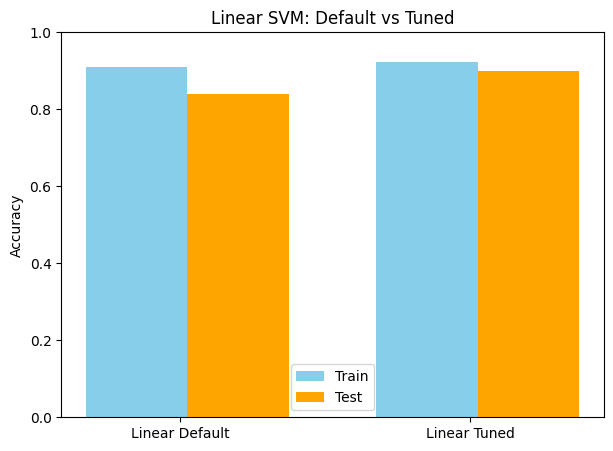

In [205]:
# SVM with linear kernel default & tuned on training and test data
train_acc_linear_default = accuracy_score(y_train, y_train_pred_lin_def)
test_acc_linear_default = accuracy_score(y_test, y_test_pred_lin_def)

svm_linear_tuned = SVC(kernel='linear', C=best_lin_C, class_weight=best_lin_weight)
svm_linear_tuned.fit(X_train_scaled, y_train)
y_train_pred_lin_tuned = svm_linear_tuned.predict(X_train_scaled)
y_test_pred_lin_tuned = svm_linear_tuned.predict(X_test_scaled)

train_acc_linear_tuned = accuracy_score(y_train, y_train_pred_lin_tuned)
test_acc_linear_tuned = accuracy_score(y_test, y_test_pred_lin_tuned)

# Create plot
labels = ['Linear Default', 'Linear Tuned']
train_accs = [train_acc_linear_default, train_acc_linear_tuned]
test_accs = [test_acc_linear_default, test_acc_linear_tuned]

plt.figure(figsize=(7,5))
plt.bar([0, 1], train_accs, width=0.35, label='Train', color='skyblue')
plt.bar([i+0.35 for i in range(2)], test_accs, width=0.35, label='Test', color='orange')
plt.xticks([i+0.15 for i in range(2)], labels)
plt.ylim(0, 1)
plt.title("Linear SVM: Default vs Tuned")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


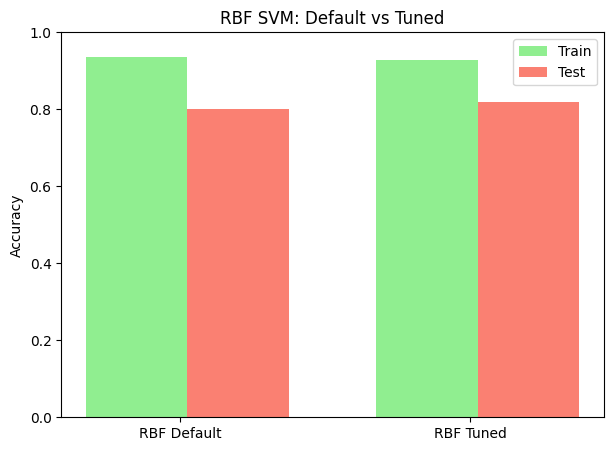

In [206]:
# Get best RBF model using tuned hyperparams
svm_rbf_tuned = SVC(kernel='rbf', C=best_C, gamma=best_gamma)
svm_rbf_tuned.fit(X_train_scaled, y_train)
y_train_pred_rbf_tuned = svm_rbf_tuned.predict(X_train_scaled)
y_test_pred_rbf_tuned = svm_rbf_tuned.predict(X_test_scaled)

train_acc_rbf_default = accuracy_score(y_train, y_train_pred_rbf_def)
test_acc_rbf_default = accuracy_score(y_test, y_test_pred_rbf_def)
train_acc_rbf_tuned = accuracy_score(y_train, y_train_pred_rbf_tuned)
test_acc_rbf_tuned = accuracy_score(y_test, y_test_pred_rbf_tuned)

# Create plot
labels = ['RBF Default', 'RBF Tuned']
train_accs = [train_acc_rbf_default, train_acc_rbf_tuned]
test_accs = [test_acc_rbf_default, test_acc_rbf_tuned]

plt.figure(figsize=(7,5))
plt.bar([0, 1], train_accs, width=0.35, label='Train', color='lightgreen')
plt.bar([i+0.35 for i in range(2)], test_accs, width=0.35, label='Test', color='salmon')
plt.xticks([i+0.15 for i in range(2)], labels)
plt.ylim(0, 1)
plt.title("RBF SVM: Default vs Tuned")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


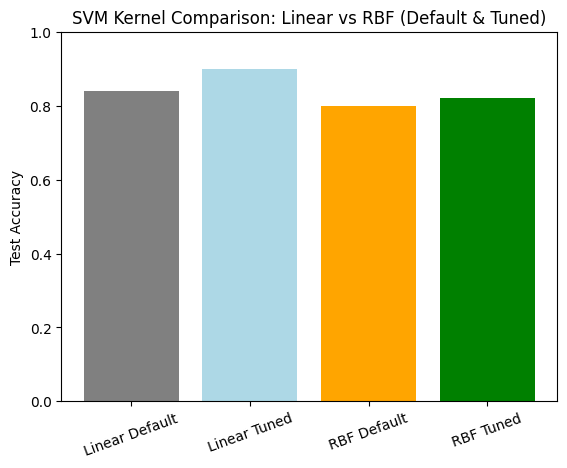

In [207]:
 # Plot comparison of linear and RBF default vs tuned with test data

methods = ['Linear Default', 'Linear Tuned', 'RBF Default', 'RBF Tuned']
test_acc = [
    accuracy_score(y_test, y_test_pred_lin_def),
    best_lin_acc,
    accuracy_score(y_test, y_test_pred_rbf_def),
    best_rbf_acc
]

plt.bar(methods, test_acc, color=['gray', 'lightblue', 'orange', 'green'])
plt.ylabel("Test Accuracy")
plt.title("SVM Kernel Comparison: Linear vs RBF (Default & Tuned)")
plt.ylim(0, 1)
plt.xticks(rotation=20)
plt.show()
